In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
print(os.getcwd())


# Load the data from an Excel file


C:\Users\palace mouse\Desktop\indicative


In [50]:

file_path ='C:/Users/palace mouse/Desktop/indicative/Key CBK Indicative Exchange Rates (3).xlsx'
data = pd.read_excel(file_path)
print(data.head())




         Date   Currency      Mean      Buy      Sell
0  01/01/1970  US DOLLAR  100.4232  97.4105  102.1154
1  12/09/2003  US DOLLAR   84.1483  84.0539   84.2428
2  12/09/2004  US DOLLAR   84.3208  84.2250   84.4167
3  12/09/2004  US DOLLAR   84.3208  84.2250   84.4167
4  02/11/2004  US DOLLAR   81.2078  81.1078   81.3078


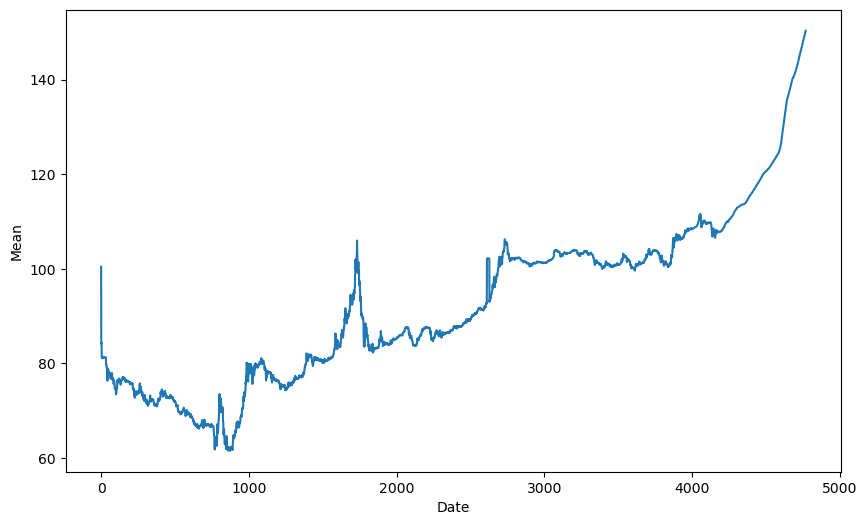

In [61]:
import matplotlib.pyplot as plt
import numpy as np
data= pd.read_excel(file_path)
plt.figure(figsize=(10, 6))
plt.plot(data['Mean']) 
plt.xlabel('Date')
plt.ylabel('Mean')
plt.show()



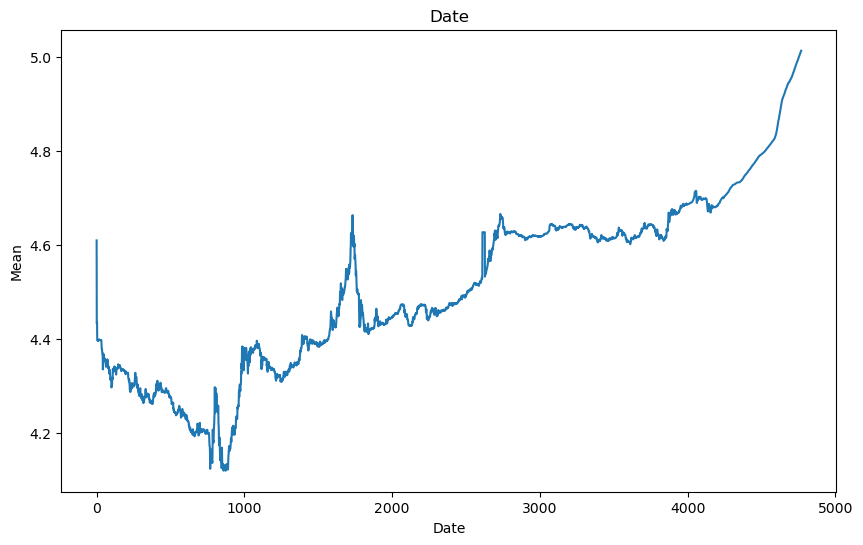

In [62]:
import numpy as np

transformed_data = np.log(data['Mean'])

plt.figure(figsize=(10, 6))
plt.plot(transformed_data)
plt.title('Date')
plt.xlabel('Date')
plt.ylabel('Mean')
plt.show()


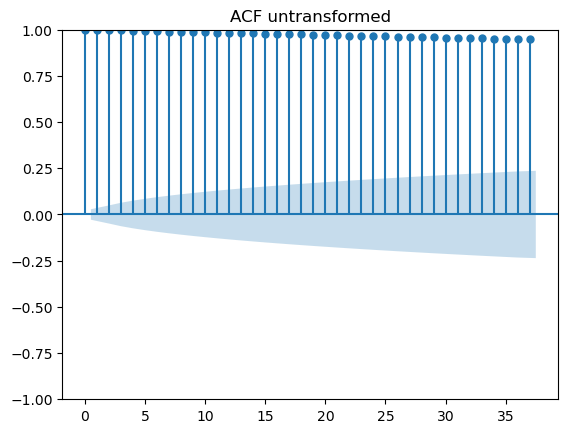

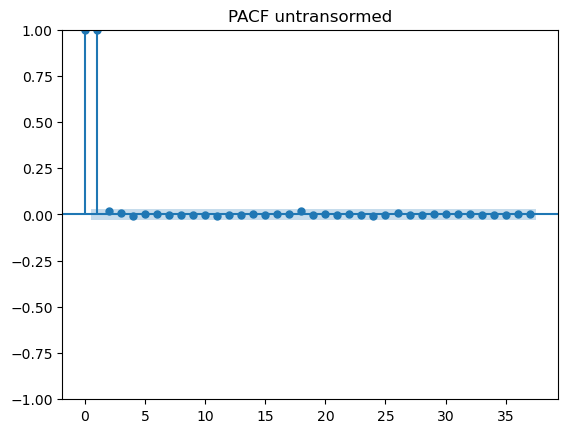

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF for untransformed data
plot_acf(data['Mean'])
plt.title('ACF untransformed')
plt.show()

plot_pacf(data['Mean'])
plt.title('PACF untransormed')
plt.show()

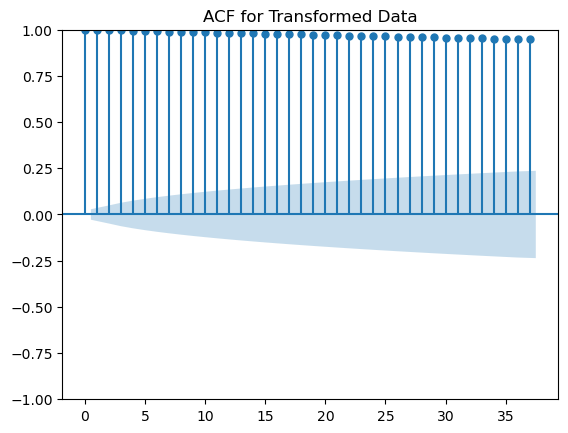

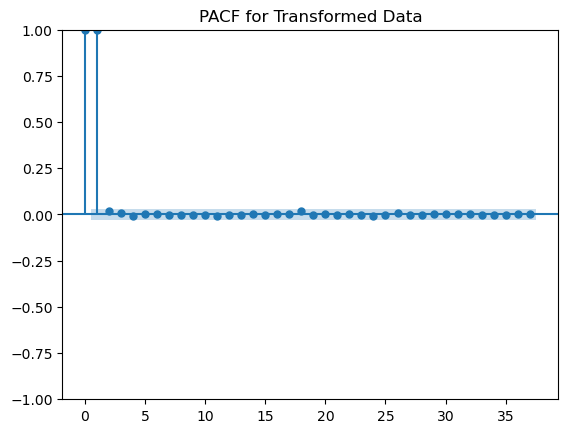

In [70]:
# ACF and PACF for transformed data
plot_acf(data['Mean'])
plt.title('ACF for Transformed Data')
plt.show()

plot_pacf(data['Mean'])
plt.title('PACF for Transformed Data')
plt.show()

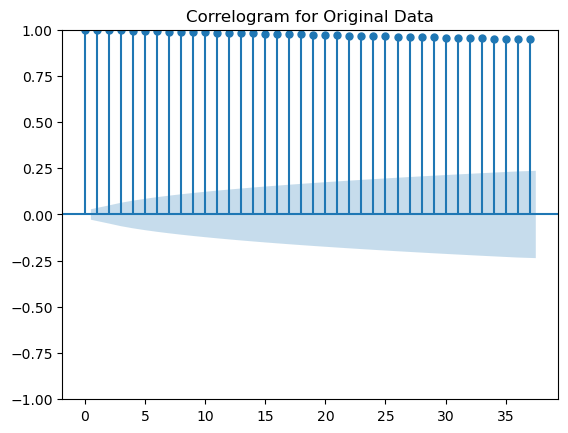

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting correlogram for original data
plot_acf(data['Mean'])
plt.title('Correlogram for Original Data')
plt.show()


In [72]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test for original data
result_orig = adfuller(data['Mean'])
print('ADF Statistic for original data:', result_orig[0])
print('p-value:', result_orig[1])

# Dickey-Fuller test for transformed data
result_trans = adfuller(transformed_data.dropna())
print('ADF Statistic for transformed data:', result_trans[0])
print('p-value:', result_trans[1])


ADF Statistic for original data: 2.114661855284271
p-value: 0.9988046131478561
ADF Statistic for transformed data: 0.8367483716342672
p-value: 0.9922067842001964


In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model on the original or transformed data
# Example ARIMA(1,1,1) model on transformed data
model = ARIMA(transformed_data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Mean   No. Observations:                 4769
Model:                 ARIMA(1, 1, 1)   Log Likelihood               18335.042
Date:                Fri, 03 Nov 2023   AIC                         -36664.085
Time:                        17:36:42   BIC                         -36644.675
Sample:                             0   HQIC                        -36657.266
                               - 4769                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8500      0.007   -127.041      0.000      -0.863      -0.837
ma.L1          0.9432      0.003    272.482      0.000       0.936       0.950
sigma2      2.671e-05   4.89e-08    545.709      0.0

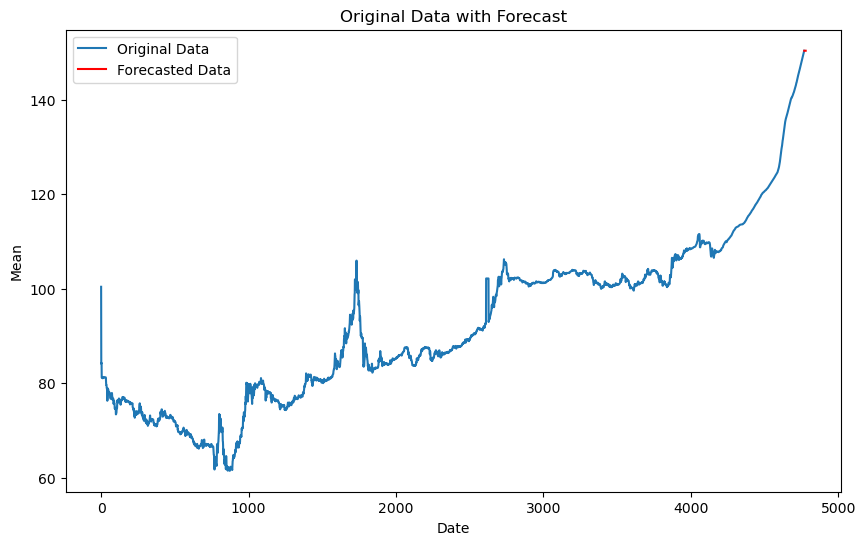

In [74]:
# Forecast using the ARIMA model
forecast = model_fit.forecast(steps=10)  # Change steps as needed

# Plotting the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(np.exp(transformed_data), label='Original Data')  # If log transformation was used
plt.plot(np.exp(forecast), color='red', label='Forecasted Data')
plt.title('Original Data with Forecast')
plt.xlabel('Date')
plt.ylabel('Mean')
plt.legend()
plt.show()
